In [ ]:
# Importing necessary libraries for numerical operations, data manipulation, and plotting
import numpy as np  # Library for numerical operations, especially with arrays
import pandas as pd  # Library for data manipulation and analysis, especially with dataframes
import matplotlib.pyplot as plt  # Library for plotting graphs and visualizations

# Importing library for reading and processing images
import skimage.io  # Used for reading and writing images



# Importing tqdm for displaying progress bars in loops
import tqdm  # Used for creating progress bars to visualize the progress of loops



# Importing tensorflow for building and training deep learning models
import tensorflow  # An open-source library for machine learning and deep learning

# Importing specific functions from tqdm for progress bar
from tqdm import tqdm  # Used for creating progress bars to visualize the progress of loops

# Importing functions from sklearn for shuffling data and splitting datasets
from sklearn.utils import shuffle  # Shuffles datasets to ensure randomness
from sklearn.model_selection import train_test_split  # Splits datasets into training and testing sets

# Importing specific functions from skimage for image reading, displaying, and resizing
from skimage.io import imread, imshow  # Used for reading and displaying images
from skimage.transform import resize  # Used for transforming images, such as resizing

# Importing functions from tensorflow for image preprocessing and augmenting
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generates batches of tensor image data with real-time data augmentation

# Importing necessary components from tensorflow to create a neural network
from tensorflow.keras.models import Sequential  # Creates a linear stack of layers for a neural network
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D  # Contains different types of layers used in building neural networks

# Importing callbacks for monitoring training and saving the best model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Utilities like EarlyStopping and ModelCheckpoint to monitor training

# Importing a pre-trained DenseNet169 model from tensorflow
from tensorflow.keras.applications.densenet import DenseNet169  # Loads the pre-trained DenseNet169 model, which can be used for transfer learning

# Importing specific functions from tensorflow for loading and converting images to arrays
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Functions for loading and converting images to arrays



In [6]:
import os  # Library for operating system functionalities like path manipulations
import random  # Library for generating random numbers and shuffling
import shutil  # Library for high-level file operations like copying and moving files

# Set the path to the dataset folder containing class folders
dataset_path = r"C:\Users\Max Payne\Desktop\POT\PlantVillage"  # Path to the original dataset

# Set the paths for the train and test folders
train_path = r"C:\Users\Max Payne\Desktop\POT\train"  # Path where the training data will be stored
test_path = r"C:\Users\Max Payne\Desktop\POT\test"  # Path where the testing data will be stored

# Set the train ratio (e.g., 90% for training)
train_ratio = 0.9  # Proportion of the data to be used for training

# Get a list of class folders
class_folders = os.listdir(dataset_path)  # List all class directories in the dataset path

# Iterate over each class folder
for class_folder in class_folders:
    # Create the train and test folders for each class
    os.makedirs(os.path.join(train_path, class_folder), exist_ok=True)  # Create directory for training data of the current class
    os.makedirs(os.path.join(test_path, class_folder), exist_ok=True)  # Create directory for testing data of the current class
    
    # Get the list of images in the current class folder
    images = os.listdir(os.path.join(dataset_path, class_folder))  # List all image files in the current class folder
    num_images = len(images)  # Get the number of images in the current class folder
    
    # Shuffle the images randomly
    random.shuffle(images)  # Shuffle the list of images to randomize the selection
    
    # Calculate the number of images for the train split
    train_count = int(num_images * train_ratio)  # Determine the number of images to be used for training
    
    # Split the images into train and test sets
    train_images = images[:train_count]  # Select the first 'train_count' images for training.
    test_images = images[train_count:]  # Select the remaining images for testing.
    
    # Move the images to their respective folders
    for image in train_images:  # Iterate over the training images
        shutil.move(
            os.path.join(dataset_path, class_folder, image),  # Source path of the image
            os.path.join(train_path, class_folder, image)  # Destination path of the image in the training folder
        )
        
    for image in test_images:  # Iterate over the testing images
        shutil.move(
            os.path.join(dataset_path, class_folder, image),  # Source path of the image
            os.path.join(test_path, class_folder, image)  # Destination path of the image in the testing folder
        )


In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.1)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.1)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [8]:
train_dataset  = train_datagen.flow_from_directory(directory = r'C:\Users\Max Payne\Desktop\POT\train',
                                                   target_size = (256,256),
                                                   class_mode = 'categorical',
                                                   subset = 'training', 
                                                   batch_size = 32) 
#The code creates a validation dataset from images stored in the specified directory. It resizes all images to 256x256 pixels, categorizes them into different classes, 
#and processes them in batches of 32. The images used for validation are taken from a subset of the data, as specified when setting up the valid_datagen.

Found 1743 images belonging to 3 classes.


In [9]:
    valid_dataset = valid_datagen.flow_from_directory(directory = r'C:\Users\Max Payne\Desktop\POT\train',
                                                    target_size = (256,256),
                                                    class_mode = 'categorical',
                                                    subset = 'validation',
                                                    batch_size = 32)

Found 193 images belonging to 3 classes.


In [10]:
class_indices = train_dataset.class_indices

# Print the class indices dictionary
print(class_indices)

# Reverse the dictionary to map numerical labels to class names
class_names = {v: k for k, v in class_indices.items()}

# Print the class names for each number
for label, class_name in class_names.items():
    print(f"Number {label} corresponds to class '{class_name}'")

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}
Number 0 corresponds to class 'Potato___Early_blight'
Number 1 corresponds to class 'Potato___Late_blight'
Number 2 corresponds to class 'Potato___healthy'


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:14<00:00,  2.91s/it]


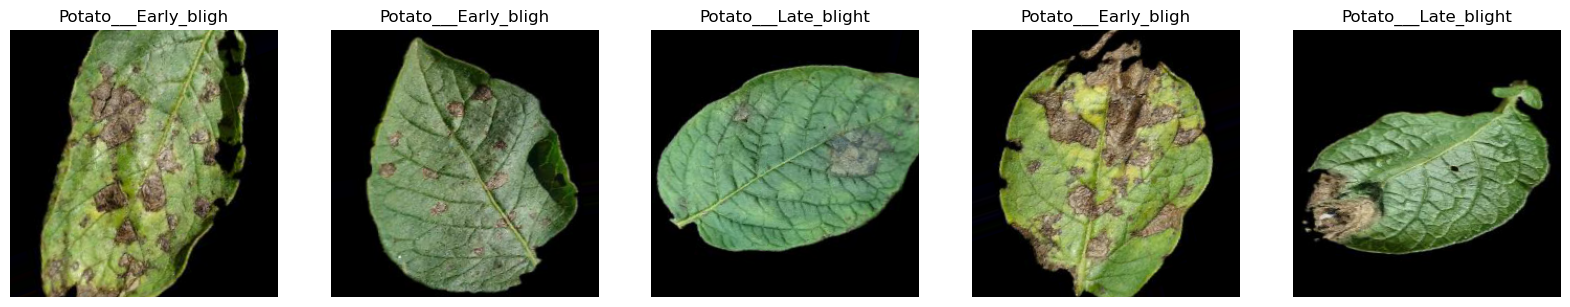

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))
#batch A subset of the dataset used to train the model in one iteration.
#Batch Size: Number of samples in one batch.
for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(train_dataset)) #randomly select batch from dataset
    rand2 = np.random.randint(30) #randomly select image from selected batch
    ax[i].imshow(train_dataset[rand1][0][rand2]) #display image 
    ax[i].axis('off')
    a = train_dataset[rand1][1][rand2] #display label
    if a[0] == 1:   #[1 0 0]
        ax[i].set_title('Potato___Early_bligh')
    elif a[1] == 1:  #[0 1 0]
        ax[i].set_title('Potato___Late_blight')
    elif a[2] == 1:  #[0 0 1]
        ax[i].set_title('Potato___healthy')


In [12]:
# Model Initialization

base_model = DenseNet169(input_shape=(256,256,3), 
                         include_top=False,  #top layers removed for adding new layers to provide flexibilyty
                         weights="imagenet")

In [13]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False  #By doing this, you are "freezing" the layers of the base model, meaning that during training, the weights of these layers will not be updated.

In [14]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet169 (Functional)             │ ?                           │      12,642,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,642,880 (48.23 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,642,880 (48.23 MB)

In [16]:
# Model Compile 

OPT    = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer=OPT)

In [17]:
model_history=model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs = 50,
                       
                        verbose = 1)

Epoch 1/50


C:\Users\Max Payne\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 725s 11s/step - auc: 0.9380 - loss: 0.5070 - val_auc: 0.9754 - val_loss: 0.3470
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 601s 10s/step - auc: 0.9889 - loss: 0.1954 - val_auc: 0.9793 - val_loss: 0.2813
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 584s 10s/step - auc: 0.9916 - loss: 0.1502 - val_auc: 0.9917 - val_loss: 0.2153
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 504s 9s/step - auc: 0.9942 - loss: 0.1256 - val_auc: 0.9970 - val_loss: 0.1033
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 487s 9s/step - auc: 0.9942 - loss: 0.1254 - val_auc: 0.9994 - val_loss: 0.0453
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 532s 10s/step - auc: 0.9959 - loss: 0.1170 - val_auc: 0.9977 - val_loss: 0.0885
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 531s 9s/step - auc: 0.9940 - loss: 0.1168 - val_auc: 0.9982 - val_loss: 0.0794
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 562s 10s/step - auc: 0.9954 - loss: 0.1029 - val_auc: 0.9986 - val_loss: 0.0762
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 441s 8s/step - auc: 0.9980 - los

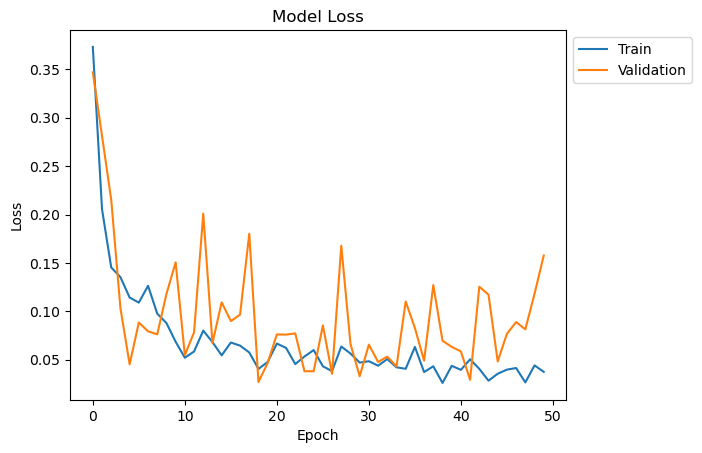

In [18]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

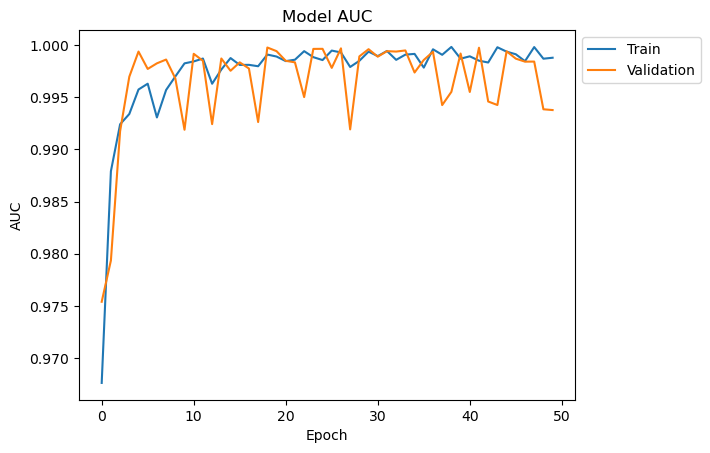

In [19]:
plt.plot(model_history.history['auc'])
plt.plot(model_history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [22]:
test_dataset  = test_datagen.flow_from_directory(directory = r'C:\Users\Max Payne\Desktop\POT\test',
                                                 target_size = (256,256),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)

Found 216 images belonging to 3 classes.


In [23]:
model.evaluate(test_dataset)

7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - auc: 0.9990 - loss: 0.0555


[0.07753945887088776, 0.9984675645828247]

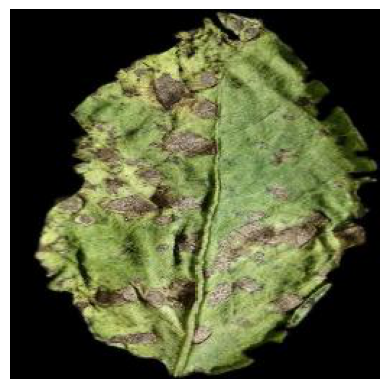

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
100.0 % chances are there that the image is Potato___Early_blight


In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}
# Load the image
img_path = r'C:\Users\Max Payne\Desktop\POT\test\Potato___Early_blight\3de47a70-4a74-462f-8b56-2088507be4ef___RS_Early.B 8832_final_masked.jpg'
img = load_img(img_path, target_size=(256, 256, 3))
img = img_to_array(img)
img = img / 255.0

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Expand dimensions and make predictions
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
probability = round(np.max(prediction) * 100, 2)

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class = idc[predicted_class_index]

print(probability, '% chances are there that the image is', predicted_class)


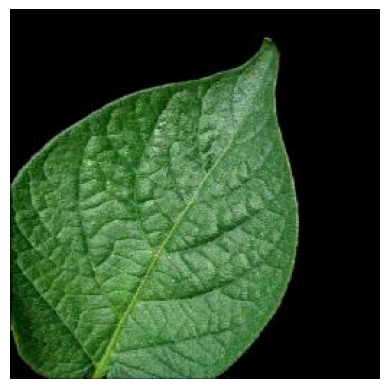

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
100.0 % chances are there that the image is Potato___healthy


In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}
# Load the image
img_path = r'C:\Users\Max Payne\Desktop\POT\test\Potato___healthy\0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814_final_masked.jpg'
img = load_img(img_path, target_size=(256, 256, 3))
img = img_to_array(img)
img = img / 255.0

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Expand dimensions and make predictions
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
probability = round(np.max(prediction) * 100, 2)

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class = idc[predicted_class_index]

print(probability, '% chances are there that the image is', predicted_class)

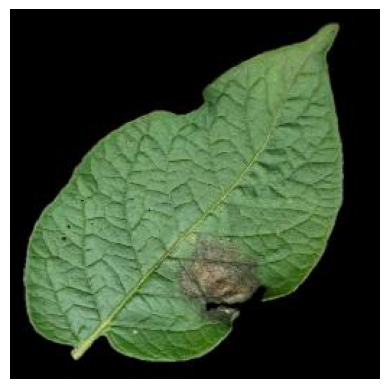

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
99.99 % chances are there that the image is Potato___Late_blight


In [29]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}
# Load the image
img_path = r'C:\Users\Max Payne\Desktop\POT\test\Potato___Late_blight\031c39d3-9a91-4e81-85ac-b36512133b0a___RS_LB 5220_final_masked.jpg'
img = load_img(img_path, target_size=(256, 256, 3))
img = img_to_array(img)
img = img / 255.0

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Expand dimensions and make predictions
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
probability = round(np.max(prediction) * 100, 2)

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class = idc[predicted_class_index]

print(probability, '% chances are there that the image is', predicted_class)

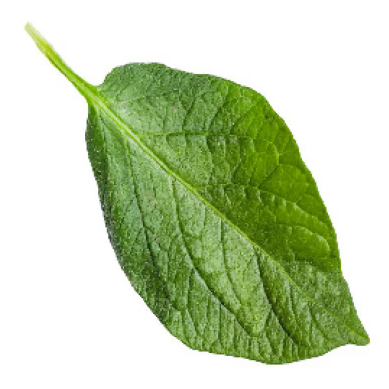

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
99.77 % chances are there that the image is Potato___healthy


In [31]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}
# Load the image
img_path = r'C:\Users\Max Payne\Desktop\POT\test\fresh-green-leaf-potato-plant-isolated_696657-22650.jpg'
img = load_img(img_path, target_size=(256, 256, 3))
img = img_to_array(img)
img = img / 255.0

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Expand dimensions and make predictions
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
probability = round(np.max(prediction) * 100, 2)

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class = idc[predicted_class_index]

print(probability, '% chances are there that the image is', predicted_class)

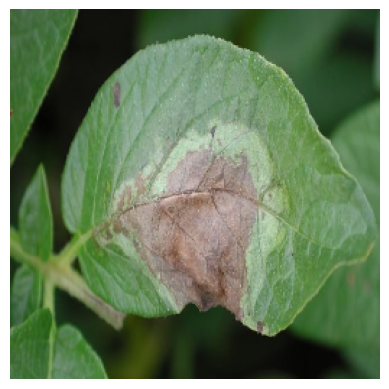

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
100.0 % chances are there that the image is Potato___Late_blight


In [33]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}
# Load the image
img_path = r'C:\Users\Max Payne\Desktop\POT\test\lateblight.jpg'
img = load_img(img_path, target_size=(256, 256, 3))
img = img_to_array(img)
img = img / 255.0

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Expand dimensions and make predictions
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
probability = round(np.max(prediction) * 100, 2)

# Get the predicted class label
predicted_class_index = np.argmax(prediction)
predicted_class = idc[predicted_class_index]

print(probability, '% chances are there that the image is', predicted_class)